In [1]:
%matplotlib inline

In [2]:
import rasterio
import fiona
import numpy as np
import matplotlib.pyplot as plt
import rasterio.tools.mask
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, RESAMPLING

Source: http://www.loicdutrieux.net/pyLandsat/NDVI_calc.html

In [3]:
cd ~/Downloads/LC80140322013079LGN03/

/Users/Gioia/Downloads/LC80140322013079LGN03


In [12]:
dst_crs = 'EPSG:4326'

with rasterio.open('B4.TIF') as src:
    affine, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': affine,
        'affine': affine,
        'width': width,
        'height': height
    })

    with rasterio.open('tmp-4.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.affine,
                src_crs=src.crs,
                dst_transform=affine,
                dst_crs=dst_crs,
                resampling=RESAMPLING.nearest)

In [15]:
fname = '/Users/Gioia/Projects/landfill-satellites/data/output/poly.shp'

with fiona.open(fname, "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]

In [16]:
out_image3, out_transform3 = rasterio.tools.mask.mask(b3, features, crop=True)

out_meta3 = src.meta.copy()
out_meta3.update({"driver": "GTiff",
                 "height": out_image3.shape[1],
                 "width": out_image3.shape[2],
                 "transform": out_transform3})    

out_image4, out_transform4 = rasterio.tools.mask.mask(b4, features, crop=True)

out_meta4 = src.meta.copy()
out_meta4.update({"driver": "GTiff",
                 "height": out_image4.shape[1],
                 "width": out_image4.shape[2],
                 "transform": out_transform4})    

AttributeError: 'numpy.ndarray' object has no attribute 'nodata'

In [4]:
# We handle the connections with "with"
with rasterio.open('tmp-3.TIF') as src:
    b3 = src.read(1)
    
# with rasterio.open('tmp-4.TIF') as src:
#     b4 = src.read(1)

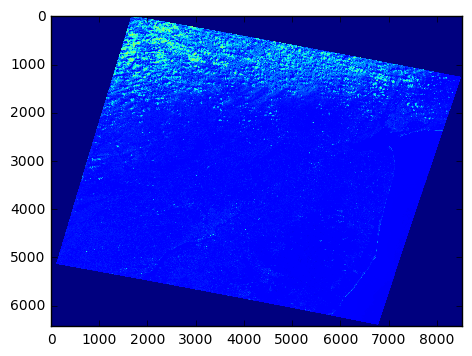

In [8]:
show(b3)

In [5]:
# Calculate NDVI
ndvi = (b4.astype(float) - b3.astype(float)) / (b4 + b3)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


In [7]:
# Take a spatial subset of the ndvi layer produced
ndvi_sub = ndvi[2000:3000, 2000:3000]

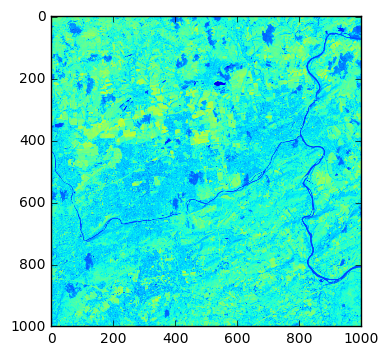

In [8]:
plt.imshow(ndvi_sub)